## Exploring the Relationship Between Teacher Salaries, National Average Salaries, and Student Outcomes (PISA Scores) in 2022

### Objective:

- Investigate how teacher salaries correlate with student performance (PISA scores).
- Compare teacher salaries to average national salaries.
- Analyse disparities in student outcomes between disadvantaged and advantaged students.
- Identify potential trends across different education levels.

### Research Questions:

- Does higher teacher pay correlate with better student outcomes?
- How do teacher salaries compare to national average salaries?
- Do teacher salaries impact educational equity (performance gaps between disadvantaged and advantaged students)?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.graph_objs as go
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [2]:
import sys
sys.path.insert(0, '/Users/beejalparekh/Desktop/Bootcamp/_DA_course/_functions_/')
from functions_eda import *

### 1. Load the datasets & check the data

In [3]:
# Import the data
teacher_salaries = pd.read_csv('/Users/beejalparekh/Desktop/Bootcamp/_DA_course/_DA-project_/Datasets/World Populations Review/teacher-salary-by-country-2022.csv')
average_salaries = pd.read_csv('/Users/beejalparekh/Desktop/Bootcamp/_DA_course/_DA-project_/Datasets/UNECE/AVG monthly wages.csv')
pisa_scores = pd.ExcelFile('/Users/beejalparekh/Desktop/Bootcamp/_DA_course/_DA-project_/Datasets/OECD PISA/PISA mean scores 2022.xlsx')
ppp_conversion_factor = pd.read_csv('/Users/beejalparekh/Desktop/Bootcamp/_DA_course/_DA-project_/Datasets/World Bank Group/PPP conversion factor private consumption.csv')

# Raw copies
raw_teacher_salaries = teacher_salaries.copy()
raw_average_salaries = average_salaries.copy()

In [4]:
teacher_salaries.head()

,flagCode,country,TeacherSalary_PrimarySchoolTeacherStarting_USD_2022,TeacherSalary_PrimarySchoolTeacherTopOfScale_USD_2022,TeacherSalary_LowerSecondarySchoolTeacherStarting_USD_2022,TeacherSalary_LowerSecondarySchoolTeacherTopOfScale_USD_2022,TeacherSalary_UpperSecondarySchoolTeacherStarting_USD_2022,TeacherSalary_UpperSecondarySchoolTeacherTopOfScale_USD_2022
0,LU,Luxembourg,71647,126576.0,81200,141144.0,81200,141144.0
1,DE,Germany,70419,91713.0,77905,101510.0,81141,110694.0
2,DK,Denmark,53364,61473.0,53598,61968.0,50444,65555.0
3,AT,Austria,49646,86526.0,49646,92041.0,49646,102120.0
4,NL,Netherlands,48805,99715.0,48662,99717.0,48662,99717.0


In [5]:
average_salaries.head()

,Indicator,Country,2018,2019,2020,2021,2022
0,"US$, at current Exchange Rates",Albania,468.5,476.8,493.9,552.5,547.6
1,"US$, at current Exchange Rates",Andorra,..,..,..,..,..
2,"US$, at current Exchange Rates",Armenia,357.6,380.2,388.0,405.0,540.7
3,"US$, at current Exchange Rates",Austria,4287.6,4171.7,4310.9,4639.7,4326.3
4,"US$, at current Exchange Rates",Azerbaijan,320.4,373.6,416.3,430.6,494.1


In [6]:
ppp_conversion_factor.head(10)

,Country Name,Country Code,2022
0,Aruba,ABW,NaN
1,Africa Eastern and Southern,AFE,NaN
2,Afghanistan,AFG,NaN
3,Africa Western and Central,AFW,NaN
4,Angola,AGO,228.870971
5,Albania,ALB,49.213276
6,Andorra,AND,NaN
7,Arab World,ARB,NaN
8,United Arab Emirates,ARE,2.659121
9,Argentina,ARG,NaN


In [7]:
# Extract tabs from PISA excel
file_path = '/Users/beejalparekh/Desktop/Bootcamp/_DA_course/_DA-project_/Datasets/OECD PISA/PISA mean scores 2022.xlsx'
# Table I.1 Snapshot of performance in mathematics, reading and science
pisa_mean_scores = pd.read_excel(file_path, sheet_name=1)
# Table I.2 Snapshot of socio-economic disparities in academic performance
pisa_socio_economic = pd.read_excel(file_path, sheet_name=2)
# Table I.3 Snapshot of gender gaps in performance
pisa_gender = pd.read_excel(file_path, sheet_name=3)
# Table I.4 Snapshot of immigrant students
pisa_immigrants = pd.read_excel(file_path, sheet_name=4)

Clean up pisa mean scores dataframe - get rid of empty rows and columns

In [8]:
# Set row 14 (index 13) as the header
pisa_mean_scores.columns = pisa_mean_scores.iloc[13]  # Assign row 14 as column headers
pisa_mean_scores = pisa_mean_scores[14:].reset_index(drop=True)  # Remove the old header row

In [9]:
pisa_mean_scores = pisa_mean_scores.iloc[:, :4]

In [10]:
#Set row 1 as header
pisa_mean_scores.columns = pisa_mean_scores.iloc[0]  # Assign row 14 as column headers
pisa_mean_scores = pisa_mean_scores[2:].reset_index(drop=True)  # Remove the old header row and row 1

In [11]:
pisa_mean_scores.columns = pisa_mean_scores.columns.fillna('Country')
pisa_mean_scores = pisa_mean_scores.iloc[1:].reset_index(drop=True)

In [12]:
pisa_mean_scores.head()

,Country,Mathematics,Reading,Science
0,Singapore,574.66382,542.553322,561.433275
1,Japan,535.579306,515.854614,546.634454
2,Korea,527.302502,515.415392,527.822418
3,Estonia,509.946953,511.030332,525.811778
4,Switzerland,507.990586,483.331734,502.523242


Clean up pisa socio economic data - get rid of empty rows and columns

In [13]:
# Set row 14 (index 13) as the header
pisa_socio_economic.columns = pisa_socio_economic.iloc[13]  # Assign row 14 as column headers
pisa_socio_economic = pisa_socio_economic[17:].reset_index(drop=True)  # Remove the old header row

In [14]:
pisa_socio_economic = pisa_socio_economic.iloc[:, :5]

In [15]:
pisa_socio_economic.columns = ['Country', 
              'Coverage Index 3:Coverage of 15-year-old population', 
              'Strength: Percentage of variance in mathematics performance explained by ESCS1', 
             'Percentage of disadvantaged students who are academically resilient',
             'Difference between advantaged and disadvantaged students in mathematics',
             ]

In [16]:
pisa_socio_economic.head()

,Country,Coverage Index 3:Coverage of 15-year-old population,Strength: Percentage of variance in mathematics performance explained by ESCS1,Percentage of disadvantaged students who are academically resilient,Difference between advantaged and disadvantaged students in mathematics
0,Cambodia,0.362739,1.924552,18.217807,20.974256
1,Uzbekistan,0.880582,2.009522,19.554093,22.379562
2,Kazakhstan,0.934065,3.939801,16.829596,41.348884
3,Albania,0.79201,4.480923,17.126901,48.755692
4,Philippines,0.832959,4.774886,11.599883,36.400151


#### 1.1 Check the structure of the dataframes

In [17]:
print(teacher_salaries.shape)
print(average_salaries.shape)
print(pisa_mean_scores.shape)
print(pisa_socio_economic.shape)
print(ppp_conversion_factor.shape)

(34, 8)
(56, 7)
(91, 4)
(94, 5)
(266, 3)


In [18]:
teacher_salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 8 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   flagCode                                                      34 non-null     object 
 1   country                                                       34 non-null     object 
 2   TeacherSalary_PrimarySchoolTeacherStarting_USD_2022           34 non-null     int64  
 3   TeacherSalary_PrimarySchoolTeacherTopOfScale_USD_2022         31 non-null     float64
 4   TeacherSalary_LowerSecondarySchoolTeacherStarting_USD_2022    34 non-null     int64  
 5   TeacherSalary_LowerSecondarySchoolTeacherTopOfScale_USD_2022  31 non-null     float64
 6   TeacherSalary_UpperSecondarySchoolTeacherStarting_USD_2022    34 non-null     int64  
 7   TeacherSalary_UpperSecondarySchoolTeacherTopOfScale_USD_2022  31 non-null 

In [19]:
average_salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Indicator  56 non-null     object
 1   Country    56 non-null     object
 2   2018       56 non-null     object
 3   2019       56 non-null     object
 4   2020       56 non-null     object
 5   2021       56 non-null     object
 6   2022       56 non-null     object
dtypes: object(7)
memory usage: 3.2+ KB


In [20]:
pisa_mean_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Country      89 non-null     object
 1   Mathematics  81 non-null     object
 2   Reading      81 non-null     object
 3   Science      81 non-null     object
dtypes: object(4)
memory usage: 3.0+ KB


In [21]:
pisa_socio_economic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 5 columns):
 #   Column                                                                          Non-Null Count  Dtype 
---  ------                                                                          --------------  ----- 
 0   Country                                                                         92 non-null     object
 1   Coverage Index 3:Coverage of 15-year-old population                             81 non-null     object
 2   Strength: Percentage of variance in mathematics performance explained by ESCS1  81 non-null     object
 3   Percentage of disadvantaged students who are academically resilient             81 non-null     object
 4   Difference between advantaged and disadvantaged students in mathematics         81 non-null     object
dtypes: object(5)
memory usage: 3.8+ KB


In [22]:
ppp_conversion_factor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  266 non-null    object 
 1   Country Code  266 non-null    object 
 2   2022          171 non-null    float64
dtypes: float64(1), object(2)
memory usage: 6.4+ KB


### 2. Data cleaning

#### 2.1 Convert data types if needed

In [23]:
# Convert salary year columns to float
cols = ['2018', '2019', '2020', '2021', '2022']
average_salaries[cols] = average_salaries[cols].apply(pd.to_numeric, errors="coerce")
average_salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Indicator  56 non-null     object 
 1   Country    56 non-null     object 
 2   2018       50 non-null     float64
 3   2019       49 non-null     float64
 4   2020       50 non-null     float64
 5   2021       50 non-null     float64
 6   2022       50 non-null     float64
dtypes: float64(5), object(2)
memory usage: 3.2+ KB


In [24]:
# Convert mean scores columns to numeric
cols = ['Coverage Index 3:Coverage of 15-year-old population', 
        'Strength: Percentage of variance in mathematics performance explained by ESCS1', 
        'Percentage of disadvantaged students who are academically resilient',
       'Difference between advantaged and disadvantaged students in mathematics'
       ]
pisa_socio_economic[cols] = pisa_socio_economic[cols].apply(pd.to_numeric, errors="coerce")
pisa_socio_economic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 5 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   Country                                                                         92 non-null     object 
 1   Coverage Index 3:Coverage of 15-year-old population                             81 non-null     float64
 2   Strength: Percentage of variance in mathematics performance explained by ESCS1  80 non-null     float64
 3   Percentage of disadvantaged students who are academically resilient             80 non-null     float64
 4   Difference between advantaged and disadvantaged students in mathematics         80 non-null     float64
dtypes: float64(4), object(1)
memory usage: 3.8+ KB


In [25]:
# Convert socio-economic scores columns to numeric
cols = ['Mathematics', 'Reading', 'Science']
pisa_mean_scores[cols] = pisa_mean_scores[cols].apply(pd.to_numeric, errors="coerce")
pisa_mean_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      89 non-null     object 
 1   Mathematics  81 non-null     float64
 2   Reading      81 non-null     float64
 3   Science      81 non-null     float64
dtypes: float64(3), object(1)
memory usage: 3.0+ KB


#### 2.2 Handle missing values (drop, impute, or fill)

In [26]:
# Identify missing values - teacher salaries
teacher_salaries.isnull().sum()

flagCode                                                        0
country                                                         0
TeacherSalary_PrimarySchoolTeacherStarting_USD_2022             0
TeacherSalary_PrimarySchoolTeacherTopOfScale_USD_2022           3
TeacherSalary_LowerSecondarySchoolTeacherStarting_USD_2022      0
TeacherSalary_LowerSecondarySchoolTeacherTopOfScale_USD_2022    3
TeacherSalary_UpperSecondarySchoolTeacherStarting_USD_2022      0
TeacherSalary_UpperSecondarySchoolTeacherTopOfScale_USD_2022    3
dtype: int64

In [27]:
teacher_salaries[teacher_salaries['TeacherSalary_PrimarySchoolTeacherTopOfScale_USD_2022'].isnull()]

,flagCode,country,TeacherSalary_PrimarySchoolTeacherStarting_USD_2022,TeacherSalary_PrimarySchoolTeacherTopOfScale_USD_2022,TeacherSalary_LowerSecondarySchoolTeacherStarting_USD_2022,TeacherSalary_LowerSecondarySchoolTeacherTopOfScale_USD_2022,TeacherSalary_UpperSecondarySchoolTeacherStarting_USD_2022,TeacherSalary_UpperSecondarySchoolTeacherTopOfScale_USD_2022
22,EE,Estonia,26031,NaN,26031,NaN,26031,NaN
29,BR,Brazil,20261,NaN,20261,NaN,20261,NaN
31,LV,Latvia,17039,NaN,17039,NaN,17039,NaN


In [28]:
# Identify missing values - average salaries
average_salaries.isnull().sum()

Indicator    0
Country      0
2018         6
2019         7
2020         6
2021         6
2022         6
dtype: int64

In [29]:
average_salaries[average_salaries['2022'].isnull()]

,Indicator,Country,2018,2019,2020,2021,2022
1,"US$, at current Exchange Rates",Andorra,NaN,NaN,NaN,NaN,NaN
28,"US$, at current Exchange Rates",Liechtenstein,NaN,NaN,NaN,NaN,NaN
32,"US$, at current Exchange Rates",Monaco,NaN,NaN,NaN,NaN,NaN
41,"US$, at current Exchange Rates",Russian Federation,NaN,NaN,NaN,NaN,NaN
42,"US$, at current Exchange Rates",San Marino,NaN,NaN,NaN,NaN,NaN
51,"US$, at current Exchange Rates",Turkmenistan,NaN,NaN,NaN,NaN,NaN


In [30]:
average_salaries = average_salaries.drop(columns=['2018', '2019','2020','2021'])

In [31]:
# remove countries with no value for 2022 average salaries
average_salaries = average_salaries.dropna(subset=['2022']) 

In [32]:
# Identify missing values - average salaries
pisa_mean_scores.isnull().sum()

0
Country         2
Mathematics    10
Reading        10
Science        10
dtype: int64

In [33]:
pisa_mean_scores[pisa_mean_scores['Country'].isnull()]

,Country,Mathematics,Reading,Science
73,NaN,NaN,NaN,NaN
82,NaN,NaN,NaN,NaN


In [34]:
#remove rows with no values
pisa_mean_scores = pisa_mean_scores.dropna(subset=['Country'])

In [35]:
pisa_mean_scores[pisa_mean_scores['Mathematics'].isnull()]

,Country,Mathematics,Reading,Science
83,* Caution is required when interpreting estima...,NaN,NaN,NaN
84,** Caution is required when comparing estimate...,NaN,NaN,NaN
85,Notes: Values that are statistically significa...,NaN,NaN,NaN
86,Long-term trends are reported for the longest ...,NaN,NaN,NaN
87,The OECD average does not include Costa Rica a...,NaN,NaN,NaN
88,Countries and economies are ranked in descendi...,NaN,NaN,NaN
89,"Source: OECD, PISA 2022 Database, Tables I.B1....",NaN,NaN,NaN
90,Information on data for Cyprus: https://oe.cd/...,NaN,NaN,NaN


In [36]:
#remove rows that are footnotes
pisa_mean_scores = pisa_mean_scores.dropna(subset=['Mathematics'])

In [37]:
pisa_mean_scores.shape

(81, 4)

In [38]:
pisa_socio_economic.isnull().sum()

Country                                                                            2
Coverage Index 3:Coverage of 15-year-old population                               13
Strength: Percentage of variance in mathematics performance explained by ESCS1    14
Percentage of disadvantaged students who are academically resilient               14
Difference between advantaged and disadvantaged students in mathematics           14
dtype: int64

In [39]:
pisa_socio_economic[pisa_socio_economic['Country'].isnull()]

,Country,Coverage Index 3:Coverage of 15-year-old population,Strength: Percentage of variance in mathematics performance explained by ESCS1,Percentage of disadvantaged students who are academically resilient,Difference between advantaged and disadvantaged students in mathematics
73,NaN,NaN,NaN,NaN,NaN
82,NaN,NaN,NaN,NaN,NaN


In [40]:
pisa_socio_economic = pisa_socio_economic.dropna(subset=['Country'])

In [41]:
pisa_socio_economic[pisa_socio_economic['Coverage Index 3:Coverage of 15-year-old population'].isnull()]

,Country,Coverage Index 3:Coverage of 15-year-old population,Strength: Percentage of variance in mathematics performance explained by ESCS1,Percentage of disadvantaged students who are academically resilient,Difference between advantaged and disadvantaged students in mathematics
83,"1. ESCS refers to the PISA index of economic, ...",NaN,NaN,NaN,NaN
84,2. Academically resilient students are disadva...,NaN,NaN,NaN,NaN
85,3. A socio-economically advantaged (disadvanta...,NaN,NaN,NaN,NaN
86,4. A positive (negative) score difference indi...,NaN,NaN,NaN,NaN
87,5. A positive (negative) score difference indi...,NaN,NaN,NaN,NaN
88,* Caution is required when interpreting estima...,NaN,NaN,NaN,NaN
89,Notes: Values that are statistically significa...,NaN,NaN,NaN,NaN
90,The OECD average does not include Costa Rica a...,NaN,NaN,NaN,NaN
91,Countries and economies are ranked in ascendin...,NaN,NaN,NaN,NaN
92,"Source: OECD, PISA 2022 Database, Tables I.B1....",NaN,NaN,NaN,NaN


In [42]:
# remove rows that are footnotes
pisa_socio_economic = pisa_socio_economic.dropna(subset=['Coverage Index 3:Coverage of 15-year-old population'])

In [43]:
pisa_socio_economic[pisa_socio_economic['Strength: Percentage of variance in mathematics performance explained by ESCS1'].isnull()]

,Country,Coverage Index 3:Coverage of 15-year-old population,Strength: Percentage of variance in mathematics performance explained by ESCS1,Percentage of disadvantaged students who are academically resilient,Difference between advantaged and disadvantaged students in mathematics
72,Costa Rica,0.775881,NaN,NaN,NaN


In [44]:
#remove Costa Rica
pisa_socio_economic = pisa_socio_economic.dropna(subset=['Strength: Percentage of variance in mathematics performance explained by ESCS1'])

In [45]:
# Identify missing values - ppp conversion factor
ppp_conversion_factor.isnull().sum()

Country Name     0
Country Code     0
2022            95
dtype: int64

In [46]:
ppp_conversion_factor[ppp_conversion_factor['2022'].isnull()]

,Country Name,Country Code,2022
0,Aruba,ABW,NaN
1,Africa Eastern and Southern,AFE,NaN
2,Afghanistan,AFG,NaN
3,Africa Western and Central,AFW,NaN
6,Andorra,AND,NaN
...,...,...,...
255,British Virgin Islands,VGB,NaN
256,Virgin Islands (U.S.),VIR,NaN
259,World,WLD,NaN
262,"Yemen, Rep.",YEM,NaN


In [47]:
print(teacher_salaries.isnull().sum())
print()
print(average_salaries.isnull().sum())
print()
print(pisa_mean_scores.isnull().sum())
print()
print(pisa_socio_economic.isnull().sum())

flagCode                                                        0
country                                                         0
TeacherSalary_PrimarySchoolTeacherStarting_USD_2022             0
TeacherSalary_PrimarySchoolTeacherTopOfScale_USD_2022           3
TeacherSalary_LowerSecondarySchoolTeacherStarting_USD_2022      0
TeacherSalary_LowerSecondarySchoolTeacherTopOfScale_USD_2022    3
TeacherSalary_UpperSecondarySchoolTeacherStarting_USD_2022      0
TeacherSalary_UpperSecondarySchoolTeacherTopOfScale_USD_2022    3
dtype: int64

Indicator    0
Country      0
2022         0
dtype: int64

0
Country        0
Mathematics    0
Reading        0
Science        0
dtype: int64

Country                                                                           0
Coverage Index 3:Coverage of 15-year-old population                               0
Strength: Percentage of variance in mathematics performance explained by ESCS1    0
Percentage of disadvantaged students who are academically resil

#### 2.3 Remove duplicates & fix inconsistencies (e.g., incorrect data formats, spelling errors)

In [48]:
teacher_salaries.columns

Index(['flagCode', 'country',
       'TeacherSalary_PrimarySchoolTeacherStarting_USD_2022',
       'TeacherSalary_PrimarySchoolTeacherTopOfScale_USD_2022',
       'TeacherSalary_LowerSecondarySchoolTeacherStarting_USD_2022',
       'TeacherSalary_LowerSecondarySchoolTeacherTopOfScale_USD_2022',
       'TeacherSalary_UpperSecondarySchoolTeacherStarting_USD_2022',
       'TeacherSalary_UpperSecondarySchoolTeacherTopOfScale_USD_2022'],
      dtype='object')

In [49]:
sorted(list(teacher_salaries['country']))

['Australia',
 'Austria',
 'Brazil',
 'Canada',
 'Chile',
 'Costa Rica',
 'Czech Republic',
 'Denmark',
 'Estonia',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Hungary',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'Latvia',
 'Lithuania',
 'Luxembourg',
 'Mexico',
 'Netherlands',
 'New Zealand',
 'Norway',
 'Poland',
 'Portugal',
 'Romania',
 'Slovakia',
 'Slovenia',
 'South Korea',
 'Spain',
 'Turkey',
 'United States']

In [50]:
teacher_salaries = teacher_salaries.rename(columns={'country':'Country',
                                                   'TeacherSalary_PrimarySchoolTeacherStarting_USD_2022':'primary_starting',
                                                    'TeacherSalary_PrimarySchoolTeacherTopOfScale_USD_2022':'primary_top',
                                                    'TeacherSalary_LowerSecondarySchoolTeacherStarting_USD_2022':'lower_secondary_starting',
                                                    'TeacherSalary_LowerSecondarySchoolTeacherTopOfScale_USD_2022':'lower_secondary_top',
                                                    'TeacherSalary_UpperSecondarySchoolTeacherStarting_USD_2022':'upper_secondary_starting',
                                                     'TeacherSalary_UpperSecondarySchoolTeacherTopOfScale_USD_2022':'upper_secondary_top'
                                                   })

In [51]:
average_salaries.columns

Index(['Indicator', 'Country', '2022'], dtype='object')

In [52]:
sorted(list(average_salaries['Country']))

['Albania',
 'Armenia',
 'Austria',
 'Azerbaijan',
 'Belarus',
 'Belgium',
 'Bosnia and Herzegovina',
 'Bulgaria',
 'Canada',
 'Croatia',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Estonia',
 'Finland',
 'France',
 'Georgia',
 'Germany',
 'Greece',
 'Hungary',
 'Iceland',
 'Ireland',
 'Israel',
 'Italy',
 'Kazakhstan',
 'Kyrgyzstan',
 'Latvia',
 'Lithuania',
 'Luxembourg',
 'Malta',
 'Montenegro',
 'Netherlands',
 'North Macedonia',
 'Norway',
 'Poland',
 'Portugal',
 'Republic of Moldova',
 'Romania',
 'Serbia',
 'Slovakia',
 'Slovenia',
 'Spain',
 'Sweden',
 'Switzerland',
 'Tajikistan',
 'Turkiye',
 'Ukraine',
 'United Kingdom',
 'United States',
 'Uzbekistan']

In [53]:
average_salaries = average_salaries.replace('Turkiye', 'Turkey')
average_salaries = average_salaries.replace('Czechia', 'Czech Republic')

In [54]:
# Adding columns with annual salary = converting monthly salaries to annual so it is comparable
average_salaries['Annual_Salary_2022'] = average_salaries['2022'] * 12

In [55]:
average_salaries = average_salaries.drop(columns=['Indicator'])

In [56]:
average_salaries = average_salaries.rename(columns={'2022': 'Monthly_Salary_2022'})

In [57]:
average_salaries.head()

,Country,Monthly_Salary_2022,Annual_Salary_2022
0,Albania,547.6,6571.2
2,Armenia,540.7,6488.4
3,Austria,4326.3,51915.6
4,Azerbaijan,494.1,5929.2
5,Belarus,621.9,7462.8


In [58]:
pisa_mean_scores.columns

Index(['Country', 'Mathematics', 'Reading', 'Science'], dtype='object', name=0)

In [59]:
sorted(list(pisa_mean_scores['Country']))

['Albania',
 'Argentina',
 'Australia*',
 'Austria',
 'Baku (Azerbaijan)',
 'Belgium',
 'Brazil',
 'Brunei Darussalam',
 'Bulgaria',
 'Cambodia',
 'Canada*',
 'Chile',
 'Chinese Taipei',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Denmark*',
 'Dominican Republic',
 'El Salvador',
 'Estonia',
 'Finland',
 'France',
 'Georgia',
 'Germany',
 'Greece',
 'Guatemala',
 'Hong Kong (China)*',
 'Hungary',
 'Iceland',
 'Indonesia',
 'Ireland*',
 'Israel',
 'Italy',
 'Jamaica*',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Korea',
 'Kosovo',
 'Latvia*',
 'Lithuania',
 'Macao (China)',
 'Malaysia',
 'Malta',
 'Mexico',
 'Moldova',
 'Mongolia',
 'Montenegro',
 'Morocco',
 'Netherlands*',
 'New Zealand*',
 'North Macedonia',
 'Norway',
 'Palestinian Authority',
 'Panama*',
 'Paraguay',
 'Peru',
 'Philippines',
 'Poland',
 'Portugal',
 'Qatar',
 'Romania',
 'Saudi Arabia',
 'Serbia',
 'Singapore',
 'Slovak Republic',
 'Slovenia',
 'Spain',
 'Sweden',
 'Switzerland',
 'Thailand',


In [60]:
# string replace Countries to remove * after Country name where present
pisa_mean_scores['Country'] = pisa_mean_scores['Country'].str.replace('*', '', regex=False)

In [61]:
pisa_mean_scores = pisa_mean_scores.replace('Türkiye', 'Turkey')
pisa_mean_scores = pisa_mean_scores.replace('Slovak Republic', 'Slovakia')
pisa_mean_scores = pisa_mean_scores.replace('Korea', 'South Korea')

In [62]:
pisa_socio_economic.columns

Index(['Country', 'Coverage Index 3:Coverage of 15-year-old population',
       'Strength: Percentage of variance in mathematics performance explained by ESCS1',
       'Percentage of disadvantaged students who are academically resilient',
       'Difference between advantaged and disadvantaged students in mathematics'],
      dtype='object')

In [63]:
sorted(list(pisa_socio_economic['Country']))

['Albania',
 'Argentina',
 'Australia*',
 'Austria',
 'Baku (Azerbaijan)',
 'Belgium',
 'Brazil',
 'Brunei Darussalam',
 'Bulgaria',
 'Cambodia',
 'Canada*',
 'Chile',
 'Chinese Taipei',
 'Colombia',
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Denmark*',
 'Dominican Republic',
 'El Salvador',
 'Estonia',
 'Finland',
 'France',
 'Georgia',
 'Germany',
 'Greece',
 'Guatemala',
 'Hong Kong (China)*',
 'Hungary',
 'Iceland',
 'Indonesia',
 'Ireland*',
 'Israel',
 'Italy',
 'Jamaica*',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Korea',
 'Kosovo',
 'Latvia*',
 'Lithuania',
 'Macao (China)',
 'Malaysia',
 'Malta',
 'Mexico',
 'Moldova',
 'Mongolia',
 'Montenegro',
 'Morocco',
 'Netherlands*',
 'New Zealand*',
 'North Macedonia',
 'Norway',
 'Palestinian Authority',
 'Panama*',
 'Paraguay',
 'Peru',
 'Philippines',
 'Poland',
 'Portugal',
 'Qatar',
 'Romania',
 'Saudi Arabia',
 'Serbia',
 'Singapore',
 'Slovak Republic',
 'Slovenia',
 'Spain',
 'Sweden',
 'Switzerland',
 'Thailand',
 'Türkiye',
 'U

In [64]:
# string replace Countries to remove * after Country name where present
pisa_socio_economic['Country'] = pisa_socio_economic['Country'].str.replace('*', '', regex=False)

In [65]:
pisa_socio_economic = pisa_socio_economic.replace('Türkiye', 'Turkey')
pisa_socio_economic = pisa_socio_economic.replace('Slovak Republic', 'Slovakia')
pisa_socio_economic = pisa_socio_economic.replace('Korea', 'South Korea')

In [66]:
ppp_conversion_factor = ppp_conversion_factor.rename(columns={'Country Name': 'Country'})

In [67]:
ppp_conversion_factor['Country'].unique()

array(['Aruba', 'Africa Eastern and Southern', 'Afghanistan',
       'Africa Western and Central', 'Angola', 'Albania', 'Andorra',
       'Arab World', 'United Arab Emirates', 'Argentina', 'Armenia',
       'American Samoa', 'Antigua and Barbuda', 'Australia', 'Austria',
       'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso',
       'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas, The',
       'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda',
       'Bolivia', 'Brazil', 'Barbados', 'Brunei Darussalam', 'Bhutan',
       'Botswana', 'Central African Republic', 'Canada',
       'Central Europe and the Baltics', 'Switzerland', 'Channel Islands',
       'Chile', 'China', "Cote d'Ivoire", 'Cameroon', 'Congo, Dem. Rep.',
       'Congo, Rep.', 'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica',
       'Caribbean small states', 'Cuba', 'Curacao', 'Cayman Islands',
       'Cyprus', 'Czechia', 'Germany', 'Djibouti', 'Dominica', 'Denmark',
       'Dominican Republic', 'Algeria',
 

In [68]:
ppp_conversion_factor = ppp_conversion_factor.replace('Turkiye', 'Turkey')
ppp_conversion_factor = ppp_conversion_factor.replace('Korea, Rep.', 'South Korea')
ppp_conversion_factor = ppp_conversion_factor.replace('Czechia', 'Czech Republic')
ppp_conversion_factor = ppp_conversion_factor.replace('Slovak Republic', 'Slovakia')

### 3. Merge dataframes

Teacher salaries and PPP conversion factor

In [69]:
teacher_salaries_adjusted = teacher_salaries.merge(ppp_conversion_factor, on='Country', how='left')

In [70]:
teacher_salaries_adjusted = teacher_salaries_adjusted.rename(columns={'2022': 'PPP_conversion_factor'})

In [71]:
teacher_salaries_adjusted = teacher_salaries_adjusted.drop(columns=['Country Code', 'flagCode'])

In [72]:
# Change columns values to PPP adjusted
teacher_salaries_adjusted['primary_starting'] = teacher_salaries_adjusted['primary_starting'] / teacher_salaries_adjusted['PPP_conversion_factor'] 
teacher_salaries_adjusted['primary_top'] = teacher_salaries_adjusted['primary_top'] / teacher_salaries_adjusted['PPP_conversion_factor'] 
teacher_salaries_adjusted['lower_secondary_starting'] = teacher_salaries_adjusted['lower_secondary_starting'] / teacher_salaries_adjusted['PPP_conversion_factor'] 
teacher_salaries_adjusted['lower_secondary_top'] = teacher_salaries_adjusted['upper_secondary_starting'] / teacher_salaries_adjusted['PPP_conversion_factor'] 
teacher_salaries_adjusted['upper_secondary_starting'] = teacher_salaries_adjusted['upper_secondary_starting'] / teacher_salaries_adjusted['PPP_conversion_factor'] 
teacher_salaries_adjusted['upper_secondary_top'] = teacher_salaries_adjusted['upper_secondary_top'] / teacher_salaries_adjusted['PPP_conversion_factor'] 

In [73]:
teacher_salaries_adjusted.head()

,Country,primary_starting,primary_top,lower_secondary_starting,lower_secondary_top,upper_secondary_starting,upper_secondary_top,PPP_conversion_factor
0,Luxembourg,77519.069516,136949.959427,87855.017582,87855.017582,87855.017582,152711.928591,0.924250
1,Germany,96331.762437,125461.522151,106572.458465,110999.240771,110999.240771,151427.144821,0.731005
2,Denmark,7218.839434,8315.788107,7250.493891,6823.835102,6823.835102,8867.982518,7.392324
3,Austria,67703.737847,117998.098960,67703.737847,67703.737847,67703.737847,139264.104036,0.733283
4,Netherlands,63092.971155,128907.194318,62908.107004,62908.107004,62908.107004,128909.779831,0.773541


Salaries

In [74]:
salaries = teacher_salaries.merge(
    average_salaries, on='Country', how='left')

In [75]:
salaries = salaries.drop(columns=['flagCode', 'Monthly_Salary_2022'])

All dfs

In [76]:
merged_df = teacher_salaries.merge(
    average_salaries, on='Country', how='left').merge(
    pisa_mean_scores, on='Country', how='left').merge(
    pisa_socio_economic, on='Country', how='left')

In [77]:
merged_df.head()

,flagCode,Country,primary_starting,primary_top,lower_secondary_starting,lower_secondary_top,upper_secondary_starting,upper_secondary_top,Monthly_Salary_2022,Annual_Salary_2022,Mathematics,Reading,Science,Coverage Index 3:Coverage of 15-year-old population,Strength: Percentage of variance in mathematics performance explained by ESCS1,Percentage of disadvantaged students who are academically resilient,Difference between advantaged and disadvantaged students in mathematics
0,LU,Luxembourg,71647,126576.0,81200,141144.0,81200,141144.0,6605.9,79270.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DE,Germany,70419,91713.0,77905,101510.0,81141,110694.0,3986.0,47832.0,474.826454,479.794025,492.426730,0.918940,18.701856,9.523770,111.495629
2,DK,Denmark,53364,61473.0,53598,61968.0,50444,65555.0,5667.9,68014.8,489.273877,488.800991,493.815712,0.835552,12.185310,10.238423,73.913598
3,AT,Austria,49646,86526.0,49646,92041.0,49646,102120.0,4326.3,51915.6,487.267499,480.405847,491.270959,0.887980,19.380427,8.224215,106.489929
4,NL,Netherlands,48805,99715.0,48662,99717.0,48662,99717.0,4565.3,54783.6,492.675639,459.242908,488.316836,0.785526,15.132955,10.637880,105.999229


In [78]:
merged_df.shape

(34, 17)

In [79]:
merged_df.isnull().sum()

flagCode                                                                          0
Country                                                                           0
primary_starting                                                                  0
primary_top                                                                       3
lower_secondary_starting                                                          0
lower_secondary_top                                                               3
upper_secondary_starting                                                          0
upper_secondary_top                                                               3
Monthly_Salary_2022                                                               8
Annual_Salary_2022                                                                8
Mathematics                                                                       1
Reading                                                                     

### 4. Univariate Analysis (Single Variable Analysis)
* Examine the distribution of individual variables (numerical & categorical)
* Use descriptive statistics (mean, median, mode, standard deviation)
* Visualize data using histograms, boxplots, and bar charts

Flag images for use in visualisations

In [80]:
# Path where flags are stored
flags_folder = '/Users/beejalparekh/Desktop/Bootcamp/_DA_course/_DA-project_/flags'

In [81]:
flag_files = {
    'Luxembourg': 'Luxembourg.png',
    'Germany': 'Germany.svg',
    'Denmark': 'Denmark.svg',
    'Austria': 'Austria.svg',
    'Netherlands': 'Netherlands.svg',
    'Australia': 'Australia.svg',
    'Turkey': 'Turkey.svg',
    'United States': 'USA.svg',
    'Spain': 'Spain.svg',
    'Norway': 'Norway.svg',
    'Canada': 'Canada.svg',
    'Finland': 'Finland.png',
    'Ireland': 'Ireland.svg',
    'New Zealand': 'New_Zealand.svg',
    'France': 'France.svg',
    'Portugal': 'Portugal.svg',
    'South Korea': 'South_Korea.svg',
    'Lithuania': 'Lithuania.svg',
    'Italy': 'Italy.svg',
    'Slovenia': 'Slovenia.svg',
    'Japan': 'Japan.svg',
    'Czech Republic': 'Czech_Republic.svg',
    'Estonia': 'Estonia.svg',
    'Chile': 'Chile.svg',
    'Costa Rica': 'Costa_Rica.svg',
    'Albania': 'Albania.svg',
    'Armenia': 'Armenia.svg',
    'Azerbaijan': 'Azerbaijan.svg',
    'Belarus': 'Belarus.svg',
    'Belgium': 'Belgium.svg',
    'Bosnia and Herzegovina': 'Bosnia_and_Herzegovina.svg',
    'Bulgaria': 'Bulgaria.svg',
    'Croatia': 'Croatia.svg',
    'Cyprus': 'Cyprus.svg',
    'Georgia': 'Georgia.svg',
    'Greece': 'Greece.svg',
    'Hungary': 'Hungary.svg',
    'Iceland': 'Iceland.svg',
    'Israel': 'Israel.svg',
    'Kazakhstan': 'Kazakhstan.svg',
    'Kyrgyzstan': 'Kyrgyzstan.svg',
    'Latvia': 'Latvia.svg',
    'Malta': 'Malta.svg',
    'Montenegro': 'Montenegro.svg',
    'North Macedonia': 'North_Macedonia.svg',
    'Poland': 'Poland.svg',
    'Republic of Moldova': 'Moldova.svg',
    'Romania': 'Romania.svg',
    'Serbia': 'Serbia.svg',
    'Slovakia': 'Slovakia.svg',
    'Sweden': 'Sweden.svg',
    'Switzerland': 'Switzerland.svg',
    'Tajikistan': 'Tajikistan.svg',
    'Ukraine': 'Ukraine.svg',
    'United Kingdom': 'United_Kingdom.svg',
    'Uzbekistan': 'Uzbekistan.svg',
    'Mexico': 'Mexico.svg',
    'Brazil': 'Brazil.svg',
    'Singapore': 'Singapore.svg',
    'Viet Nam': 'Vietnam.svg',
    'Brunei Darussalam': 'Brunei.svg',
    'United Arab Emirates': 'United_Arab_Emirates.svg',
    'Mongolia': 'Mongolia.svg',
    'Qatar': 'Qatar.svg',
    'Uruguay': 'Uruguay.svg',
    'Malaysia': 'Malaysia.svg',
    'Thailand': 'Thailand.svg',
    'Peru': 'Peru.svg',
    'Saudi Arabia': 'Saudi_Arabia.svg',
    'Colombia': 'Colombia.svg',
    'Argentina': 'Argentina.svg',
    'Jamaica': 'Jamaica.svg',
    'Indonesia': 'Indonesia.svg',
    'Morocco': 'Morocco.svg',
    'Philippines': 'Philippines.svg',
    'Guatemala': 'Guatemala.svg',
    'El Salvador': 'El_Salvador.svg',
    'Dominican Republic': 'Dominican_Republic.svg',
    'Paraguay': 'Paraguay.svg',
    'Cambodia': 'Cambodia.svg',
    'Macao (China)': 'Macau.svg',
    'Chinese Taipei': 'Taiwan.svg',
    'Hong Kong (China)': 'Hong_Kong.svg',
    'Kosovo': 'Kosovo.svg',
    'Palestinian Authority': 'Palestine.svg',
}

In [82]:
# Updated Country abbreviation to country name mapping
country_data = {
    "AD": "Andorra",
    "AE": "United Arab Emirates",
    "AF": "Afghanistan",
    "AG": "Antigua and Barbuda",
    "AI": "Anguilla",
    "AL": "Albania",
    "AM": "Armenia",
    "AO": "Angola",
    "AQ": "Antarctica",
    "AR": "Argentina",
    "AS": "American Samoa",
    "AT": "Austria",
    "AU": "Australia",
    "AW": "Aruba",
    "AX": "Åland Islands",
    "AZ": "Azerbaijan",
    "BA": "Bosnia and Herzegovina",
    "BB": "Barbados",
    "BD": "Bangladesh",
    "BE": "Belgium",
    "BF": "Burkina Faso",
    "BG": "Bulgaria",
    "BH": "Bahrain",
    "BI": "Burundi",
    "BJ": "Benin",
    "BL": "Saint Barthélemy",
    "BM": "Bermuda",
    "BN": "Brunei Darussalam",
    "BO": "Bolivia, Plurinational State of",
    "BQ": "Caribbean Netherlands",
    "BR": "Brazil",
    "BS": "Bahamas",
    "BT": "Bhutan",
    "BV": "Bouvet Island",
    "BW": "Botswana",
    "BY": "Belarus",
    "BZ": "Belize",
    "CA": "Canada",
    "CC": "Cocos (Keeling) Islands",
    "CD": "Congo, the Democratic Republic of the",
    "CF": "Central African Republic",
    "CG": "Republic of the Congo",
    "CH": "Switzerland",
    "CI": "Côte d'Ivoire",
    "CK": "Cook Islands",
    "CL": "Chile",
    "CM": "Cameroon",
    "CN": "China (People's Republic of China)",
    "CO": "Colombia",
    "CR": "Costa Rica",
    "CU": "Cuba",
    "CV": "Cape Verde",
    "CW": "Curaçao",
    "CX": "Christmas Island",
    "CY": "Cyprus",
    "CZ": "Czech Republic",
    "DE": "Germany",
    "DJ": "Djibouti",
    "DK": "Denmark",
    "DM": "Dominica",
    "DO": "Dominican Republic",
    "DZ": "Algeria",
    "EC": "Ecuador",
    "EE": "Estonia",
    "EG": "Egypt",
    "EH": "Western Sahara",
    "ER": "Eritrea",
    "ES": "Spain",
    "ET": "Ethiopia",
    "EU": "Europe",
    "FI": "Finland",
    "FJ": "Fiji",
    "FK": "Falkland Islands (Malvinas)",
    "FM": "Micronesia, Federated States of",
    "FO": "Faroe Islands",
    "FR": "France",
    "GA": "Gabon",
    "GB-ENG": "England",
    "GB-NIR": "Northern Ireland",
    "GB-SCT": "Scotland",
    "GB-WLS": "Wales",
    "GB": "United Kingdom",
    "GD": "Grenada",
    "GE": "Georgia",
    "GF": "French Guiana",
    "GG": "Guernsey",
    "GH": "Ghana",
    "GI": "Gibraltar",
    "GL": "Greenland",
    "GM": "Gambia",
    "GN": "Guinea",
    "GP": "Guadeloupe",
    "GQ": "Equatorial Guinea",
    "GR": "Greece",
    "GS": "South Georgia and the South Sandwich Islands",
    "GT": "Guatemala",
    "GU": "Guam",
    "GW": "Guinea-Bissau",
    "GY": "Guyana",
    "HK": "Hong Kong",
    "HM": "Heard Island and McDonald Islands",
    "HN": "Honduras",
    "HR": "Croatia",
    "HT": "Haiti",
    "HU": "Hungary",
    "ID": "Indonesia",
    "IE": "Ireland",
    "IL": "Israel",
    "IM": "Isle of Man",
    "IN": "India",
    "IO": "British Indian Ocean Territory",
    "IQ": "Iraq",
    "IR": "Iran, Islamic Republic of",
    "IS": "Iceland",
    "IT": "Italy",
    "JE": "Jersey",
    "JM": "Jamaica",
    "JO": "Jordan",
    "JP": "Japan",
    "KE": "Kenya",
    "KG": "Kyrgyzstan",
    "KH": "Cambodia",
    "KI": "Kiribati",
    "KM": "Comoros",
    "KN": "Saint Kitts and Nevis",
    "KP": "Korea, Democratic People's Republic of",
    "KR": "South Korea",
    "KW": "Kuwait",
    "KY": "Cayman Islands",
    "KZ": "Kazakhstan",
    "LA": "Laos (Lao People's Democratic Republic)",
    "LB": "Lebanon",
    "LC": "Saint Lucia",
    "LI": "Liechtenstein",
    "LK": "Sri Lanka",
    "LR": "Liberia",
    "LS": "Lesotho",
    "LT": "Lithuania",
    "LU": "Luxembourg",
    "LV": "Latvia",
    "LY": "Libya",
    "MA": "Morocco",
    "MC": "Monaco",
    "MD": "Moldova, Republic of",
    "ME": "Montenegro",
    "MF": "Saint Martin",
    "MG": "Madagascar",
    "MH": "Marshall Islands",
    "MK": "North Macedonia",
    "ML": "Mali",
    "MM": "Myanmar",
    "MN": "Mongolia",
    "MO": "Macao",
    "MP": "Northern Mariana Islands",
    "MQ": "Martinique",
    "MR": "Mauritania",
    "MS": "Montserrat",
    "MT": "Malta",
    "MU": "Mauritius",
    "MV": "Maldives",
    "MW": "Malawi",
    "MX": "Mexico",
    "MY": "Malaysia",
    "MZ": "Mozambique",
    "NA": "Namibia",
    "NC": "New Caledonia",
    "NE": "Niger",
    "NF": "Norfolk Island",
    "NG": "Nigeria",
    "NI": "Nicaragua",
    "NL": "Netherlands",
    "NO": "Norway",
    "NP": "Nepal",
    "NR": "Nauru",
    "NU": "Niue",
    "NZ": "New Zealand",
    "OM": "Oman",
    "PA": "Panama",
    "PE": "Peru",
    "PF": "French Polynesia",
    "PG": "Papua New Guinea",
    "PH": "Philippines",
    "PK": "Pakistan",
    "PL": "Poland",
    "PM": "Saint Pierre and Miquelon",
    "PN": "Pitcairn",
    "PR": "Puerto Rico",
    "PS": "Palestine",
    "PT": "Portugal",
    "PW": "Palau",
    "PY": "Paraguay",
    "QA": "Qatar",
    "RE": "Réunion",
    "RO": "Romania",
    "RS": "Serbia",
    "RU": "Russian Federation",
    "RW": "Rwanda",
    "SA": "Saudi Arabia",
    "SB": "Solomon Islands",
    "SC": "Seychelles",
    "SD": "Sudan",
    "SE": "Sweden",
    "SG": "Singapore",
    "SH": "Saint Helena, Ascension and Tristan da Cunha",
    "SI": "Slovenia",
    "SJ": "Svalbard and Jan Mayen Islands",
    "SK": "Slovakia",
    "SL": "Sierra Leone",
    "SM": "San Marino",
    "SN": "Senegal",
    "SO": "Somalia",
    "SR": "Suriname",
    "SS": "South Sudan",
    "ST": "Sao Tome and Principe",
    "SV": "El Salvador",
    "SX": "Sint Maarten (Dutch part)",
    "SY": "Syrian Arab Republic",
    "SZ": "Eswatini",
    "TC": "Turks and Caicos Islands",
    "TD": "Chad",
    "TF": "French Southern Territories",
    "TG": "Togo",
    "TH": "Thailand",
    "TJ": "Tajikistan",
    "TK": "Tokelau",
    "TL": "Timor-Leste",
    "TM": "Turkmenistan",
    "TN": "Tunisia",
    "TO": "Tonga",
    "TR": "Turkey",
    "TT": "Trinidad and Tobago",
    "TV": "Tuvalu",
    "TW": "Taiwan",
    "TZ": "Tanzania, United Republic of",
    "UA": "Ukraine",
    "UG": "Uganda",
    "UM": "US Minor Outlying Islands",
    "US": "United States",
    "UY": "Uruguay",
    "UZ": "Uzbekistan",
    "VA": "Holy See (Vatican City State)",
    "VC": "Saint Vincent and the Grenadines",
    "VE": "Venezuela, Bolivarian Republic of",
    "VG": "Virgin Islands, British",
    "VI": "Virgin Islands, U.S.",
    "VN": "Vietnam",
    "VU": "Vanuatu",
    "WF": "Wallis and Futuna Islands",
    "WS": "Samoa",
    "XK": "Kosovo",
    "YE": "Yemen",
    "YT": "Mayotte",
    "ZA": "South Africa",
    "ZM": "Zambia",
    "ZW": "Zimbabwe"
}

In [83]:
# Create dictionary to map country name to flag file name (in lowercase .svg)
country_flags = {country: f"{code.lower()}.svg" for code, country in country_data.items()}

In [84]:
# To get a country flag file path
def get_flag_file(country_name):
    flag_filename = country_flags.get(country_name)
    if flag_filename:
        return f"{flags_folder}/{flag_filename}"
    else:
        return None

Describe each dataframe

In [85]:
teacher_salaries.describe()

,primary_starting,primary_top,lower_secondary_starting,lower_secondary_top,upper_secondary_starting,upper_secondary_top
count,34.000000,31.000000,34.000000,31.000000,34.000000,31.000000
mean,34733.882353,59690.870968,35884.058824,61841.741935,37080.441176,63385.064516
std,14038.706920,23355.325398,15481.209556,25237.066289,15906.066897,25838.703147
min,16137.000000,21636.000000,16137.000000,21636.000000,16137.000000,21636.000000
25%,23821.750000,42944.500000,25410.000000,45265.000000,26090.750000,46136.000000
50%,33321.000000,56125.000000,33993.000000,57208.000000,34600.500000,60106.000000
75%,44264.500000,73356.000000,45290.500000,73356.000000,48137.750000,73356.000000
max,71647.000000,126576.000000,81200.000000,141144.000000,81200.000000,141144.000000


In [86]:
average_salaries.describe()

,Monthly_Salary_2022,Annual_Salary_2022
count,50.000000,50.00000
mean,2506.910000,30082.92000
std,2050.915921,24610.99105
min,159.600000,1915.20000
25%,919.075000,11028.90000
50%,1754.650000,21055.80000
75%,4081.675000,48980.10000
max,8156.500000,97878.00000


In [87]:
pisa_mean_scores.describe()

,Mathematics,Reading,Science
count,81.000000,81.000000,81.000000
mean,437.628343,435.037609,446.893447
std,58.219290,56.104746,55.724806
min,336.396041,328.842780,347.104162
25%,388.781607,386.284748,403.130242
50%,440.845309,438.440625,446.926795
75%,483.159455,480.405847,493.549319
max,574.663820,542.553322,561.433275


In [88]:
pisa_socio_economic.describe()

,Coverage Index 3:Coverage of 15-year-old population,Strength: Percentage of variance in mathematics performance explained by ESCS1,Percentage of disadvantaged students who are academically resilient,Difference between advantaged and disadvantaged students in mathematics
count,80.000000,80.000000,80.000000,80.000000
mean,0.844518,13.046059,11.418396,79.666230
std,0.129749,5.418233,2.903373,25.259847
min,0.362739,1.924552,6.137021,20.974256
25%,0.790389,9.890195,9.521311,64.878818
50%,0.884281,13.111244,11.026073,80.999804
75%,0.928094,16.183913,12.664252,96.677662
max,1.000000,25.837530,19.554093,133.285128


Boxplots

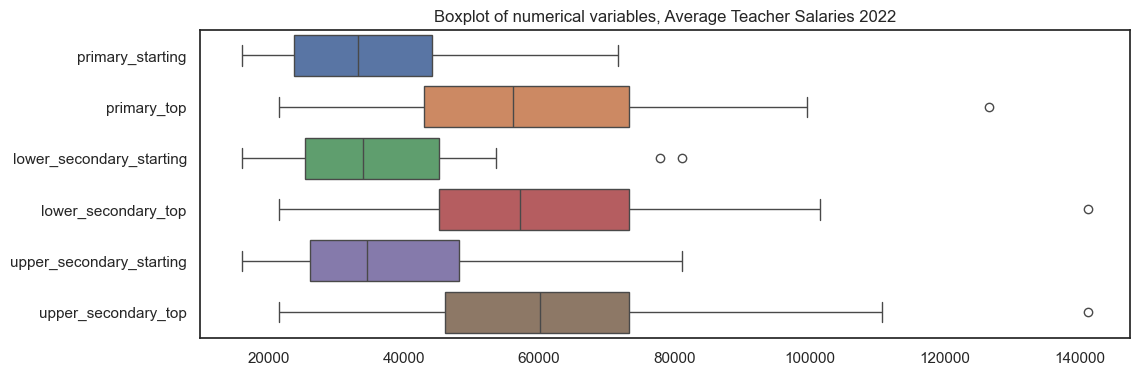

In [89]:
teacher_salary_numeric = ['primary_starting',
 'primary_top',
 'lower_secondary_starting',
 'lower_secondary_top',
 'upper_secondary_starting',
 'upper_secondary_top']
plt.figure(figsize=(12, 4))
boxplots = sns.boxplot(data=teacher_salaries[teacher_salary_numeric], orient='h')
plt.title('Boxplot of numerical variables, Average Teacher Salaries 2022')
plt.show()

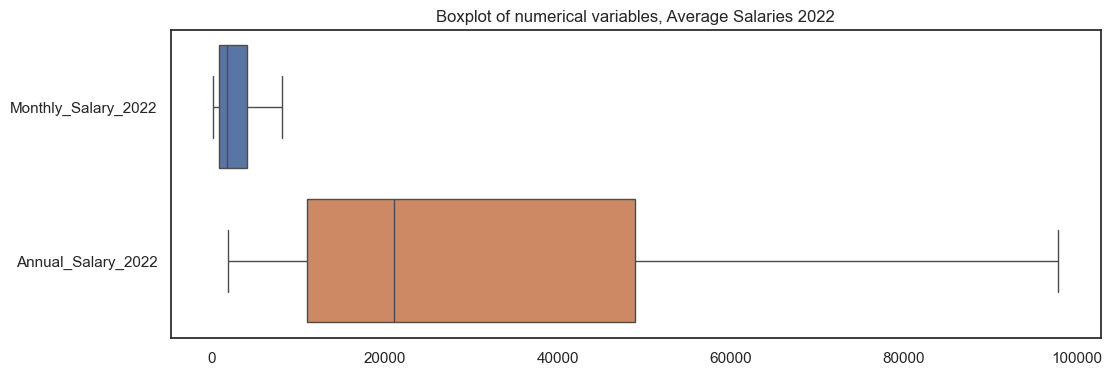

In [90]:
average_salary_numeric = ['Monthly_Salary_2022', 'Annual_Salary_2022']
plt.figure(figsize=(12, 4))
boxplots = sns.boxplot(data=average_salaries[average_salary_numeric], orient='h')
plt.title('Boxplot of numerical variables, Average Salaries 2022')
plt.show()

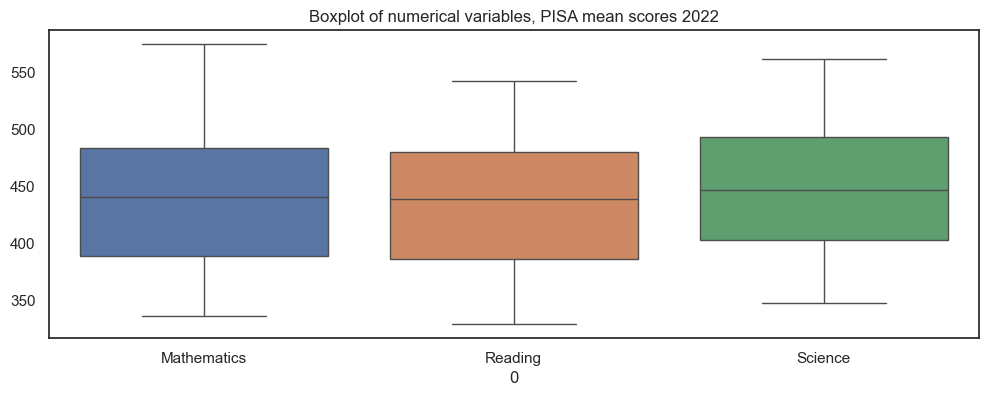

In [91]:
pisa_mean_numeric = ['Mathematics', 'Reading', 'Science']
plt.figure(figsize=(12, 4))
boxplots = sns.boxplot(data=pisa_mean_scores[pisa_mean_numeric])
plt.title('Boxplot of numerical variables, PISA mean scores 2022')
plt.show()

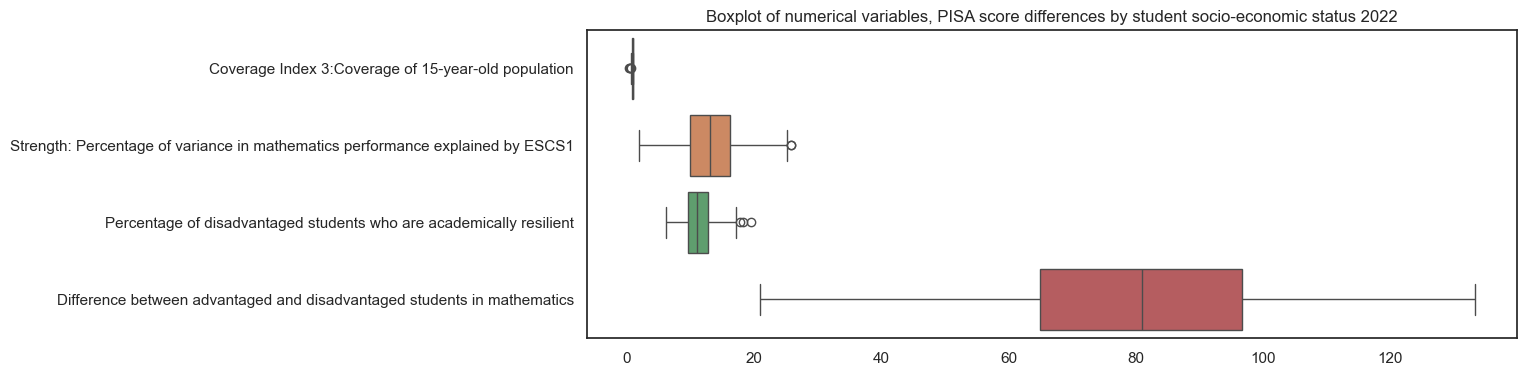

In [92]:
pisa_se_numeric = ['Coverage Index 3:Coverage of 15-year-old population',
 'Strength: Percentage of variance in mathematics performance explained by ESCS1',
 'Percentage of disadvantaged students who are academically resilient',
 'Difference between advantaged and disadvantaged students in mathematics']
plt.figure(figsize=(12, 4))
boxplots = sns.boxplot(data=pisa_socio_economic[pisa_se_numeric], orient='h')
plt.title('Boxplot of numerical variables, PISA score differences by student socio-economic status 2022')
plt.show()

Analyse the outliers

In [93]:
for i in teacher_salary_numeric:
    Q1 = teacher_salaries[i].quantile(0.25)
    Q3 = teacher_salaries[i].quantile(0.75)
    IQR = Q3 - Q1
    outliers = teacher_salaries[(teacher_salaries[i] < (Q1 - 1.5 * IQR)) | (teacher_salaries[i] > (Q3 + 1.5 * IQR))]
    print (i) 
    print('Mean value:', teacher_salaries[i].mean())
    print(outliers.loc[:, ['Country', i]])
    print('----------')

primary_starting
Mean value: 34733.882352941175
Empty DataFrame
Columns: [Country, primary_starting]
Index: []
----------
primary_top
Mean value: 59690.87096774193
      Country  primary_top
0  Luxembourg     126576.0
----------
lower_secondary_starting
Mean value: 35884.05882352941
      Country  lower_secondary_starting
0  Luxembourg                     81200
1     Germany                     77905
----------
lower_secondary_top
Mean value: 61841.74193548387
      Country  lower_secondary_top
0  Luxembourg             141144.0
----------
upper_secondary_starting
Mean value: 37080.44117647059
Empty DataFrame
Columns: [Country, upper_secondary_starting]
Index: []
----------
upper_secondary_top
Mean value: 63385.06451612903
      Country  upper_secondary_top
0  Luxembourg             141144.0
----------


In [94]:
for i in average_salary_numeric:
    Q1 = average_salaries[i].quantile(0.25)
    Q3 = average_salaries[i].quantile(0.75)
    IQR = Q3 - Q1
    outliers = average_salaries[(average_salaries[i] < (Q1 - 1.5 * IQR)) | (average_salaries[i] > (Q3 + 1.5 * IQR))]
    print (i) 
    print('Mean value:', average_salaries[i].mean())
    print(outliers.loc[:, ['Country', i]])
    print('----------')

Monthly_Salary_2022
Mean value: 2506.91
Empty DataFrame
Columns: [Country, Monthly_Salary_2022]
Index: []
----------
Annual_Salary_2022
Mean value: 30082.92
Empty DataFrame
Columns: [Country, Annual_Salary_2022]
Index: []
----------


In [95]:
for i in pisa_mean_numeric:
    Q1 = pisa_mean_scores[i].quantile(0.25)
    Q3 = pisa_mean_scores[i].quantile(0.75)
    IQR = Q3 - Q1
    outliers = pisa_mean_scores[(pisa_mean_scores[i] < (Q1 - 1.5 * IQR)) | (pisa_mean_scores[i] > (Q3 + 1.5 * IQR))]
    print (i) 
    print('Mean value:', pisa_mean_scores[i].mean())
    print(outliers.loc[:, ['Country', i]])
    print('----------')

Mathematics
Mean value: 437.62834256282355
Empty DataFrame
Columns: [Country, Mathematics]
Index: []
----------
Reading
Mean value: 435.037608537938
Empty DataFrame
Columns: [Country, Reading]
Index: []
----------
Science
Mean value: 446.89344746541127
Empty DataFrame
Columns: [Country, Science]
Index: []
----------


In [96]:
for i in pisa_se_numeric:
    Q1 = pisa_socio_economic[i].quantile(0.25)
    Q3 = pisa_socio_economic[i].quantile(0.75)
    IQR = Q3 - Q1
    outliers = pisa_socio_economic[(pisa_socio_economic[i] < (Q1 - 1.5 * IQR)) | (pisa_socio_economic[i] > (Q3 + 1.5 * IQR))]
    print (i) 
    print('Mean value:', pisa_socio_economic[i].mean())
    print(outliers.loc[:, ['Country', i]])
    print('----------')

Coverage Index 3:Coverage of 15-year-old population
Mean value: 0.8445177540183068
                         Country  \
0                       Cambodia   
25                     Guatemala   
64                        Panama   
80  Ukrainian regions (18 of 27)   

    Coverage Index 3:Coverage of 15-year-old population  
0                                            0.362739    
25                                           0.477004    
64                                           0.576539    
80                                           0.415615    
----------
Strength: Percentage of variance in mathematics performance explained by ESCS1
Mean value: 13.046058796789248
     Country  \
70  Slovakia   
71   Romania   

    Strength: Percentage of variance in mathematics performance explained by ESCS1  
70                                          25.715808                               
71                                          25.837530                               
----------
Percentage

#### Teacher salaries - univariate analysis

Bar charts

In [97]:
teacher_salaries.head()

,flagCode,Country,primary_starting,primary_top,lower_secondary_starting,lower_secondary_top,upper_secondary_starting,upper_secondary_top
0,LU,Luxembourg,71647,126576.0,81200,141144.0,81200,141144.0
1,DE,Germany,70419,91713.0,77905,101510.0,81141,110694.0
2,DK,Denmark,53364,61473.0,53598,61968.0,50444,65555.0
3,AT,Austria,49646,86526.0,49646,92041.0,49646,102120.0
4,NL,Netherlands,48805,99715.0,48662,99717.0,48662,99717.0


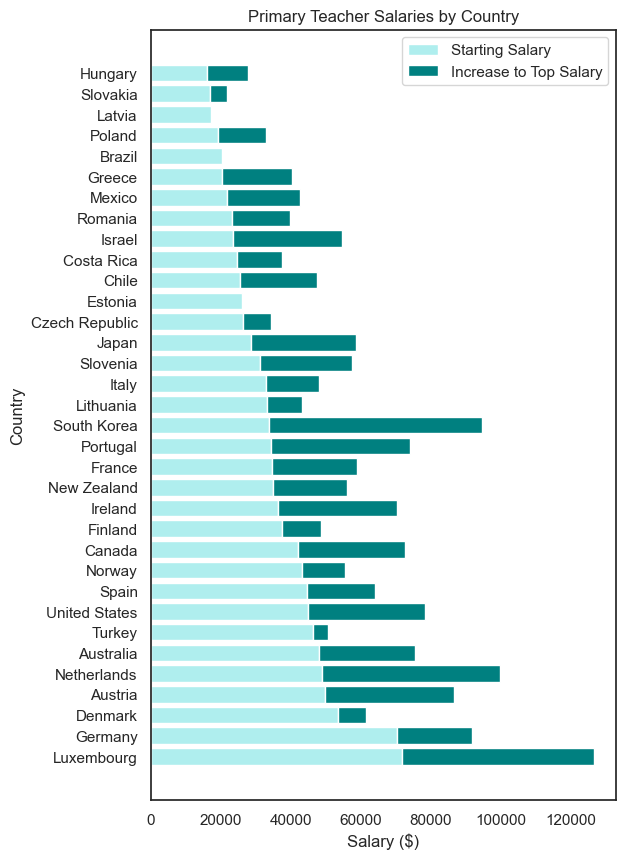

In [98]:
# Primary salaries
plt.figure(figsize=(6, 10))

# Plot the starting salary
plt.barh(teacher_salaries['Country'], teacher_salaries['primary_starting'], label='Starting Salary', color='paleturquoise')

# Plot the top salary as the difference between top and starting
plt.barh(teacher_salaries['Country'], teacher_salaries['primary_top'] - teacher_salaries['primary_starting'], 
         left=teacher_salaries['primary_starting'], label='Increase to Top Salary', color='teal')

# Labels & Title
plt.xlabel('Salary ($)')
plt.ylabel('Country')
plt.title('Primary Teacher Salaries by Country')
plt.legend()

# Save the plot
plt.savefig('primary_teacher_salaries_plot.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

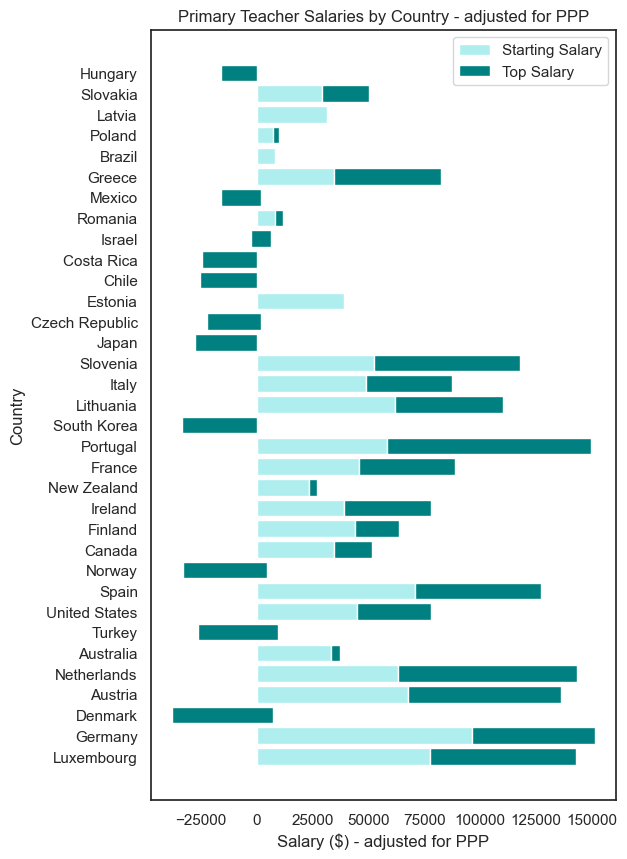

In [99]:
# Primary salaries PPP adjusted
plt.figure(figsize=(6,10))
plt.barh(teacher_salaries_adjusted['Country'], teacher_salaries_adjusted['primary_starting'], label='Starting Salary', color='paleturquoise')
plt.barh(teacher_salaries_adjusted['Country'], teacher_salaries_adjusted['primary_top']- teacher_salaries['primary_starting'], left=teacher_salaries_adjusted['primary_starting'], label='Top Salary', color='teal')

# Labels & Title
plt.xlabel('Salary ($) - adjusted for PPP')
plt.ylabel('Country')
plt.title('Primary Teacher Salaries by Country - adjusted for PPP')
plt.legend()

# Save the plot
plt.savefig('PPP_primary_teacher_salaries_plot.png', dpi=300, bbox_inches='tight')  # Save as PNG with high resolution

# Show the plot
plt.show()

In [100]:
# Inspect weird looking PPP values
teacher_salaries_adjusted[teacher_salaries_adjusted['Country'].isin(['Hungary', 'Costa Rica', 'Chile', 'Japan', 'South Korea'])]

,Country,primary_starting,primary_top,lower_secondary_starting,lower_secondary_top,upper_secondary_starting,upper_secondary_top,PPP_conversion_factor
16,South Korea,36.024267,101.261252,36.088568,36.088568,36.088568,101.325553,933.120991
20,Japan,277.603695,568.208997,277.603695,277.603695,277.603695,583.189952,103.064190
23,Chile,51.766751,95.811501,51.766751,53.529755,53.529755,99.337510,494.042985
24,Costa Rica,65.495780,99.819573,67.494940,67.494940,67.494940,102.894180,375.657788
33,Hungary,90.878661,155.417885,90.878661,90.878661,90.878661,172.684661,177.566437


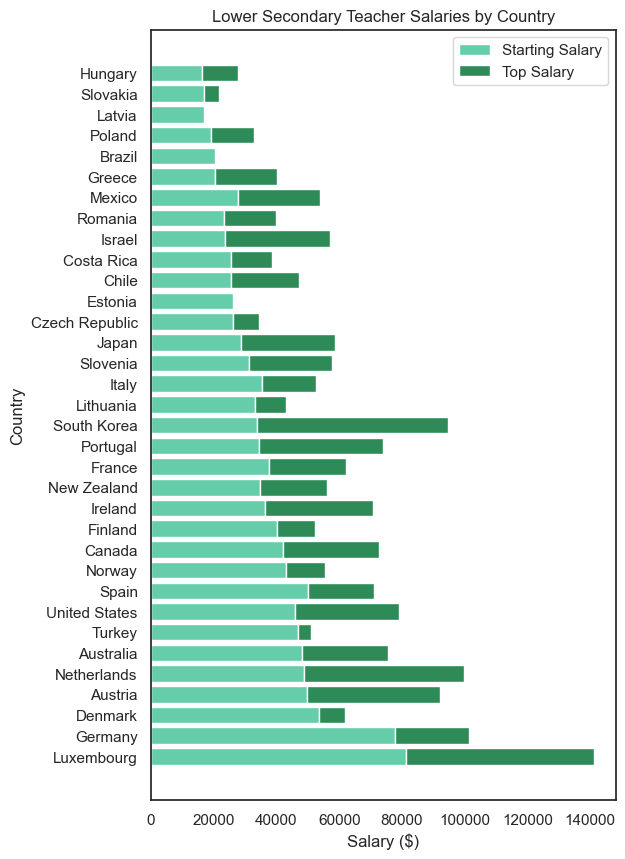

In [101]:
# Lower secondary salaries
plt.figure(figsize=(6,10))
plt.barh(teacher_salaries['Country'], teacher_salaries['lower_secondary_starting'], label='Starting Salary', color='mediumaquamarine')
plt.barh(teacher_salaries['Country'], teacher_salaries['lower_secondary_top']- teacher_salaries['lower_secondary_starting'], left=teacher_salaries['lower_secondary_starting'], label='Top Salary', color='seagreen')

# Labels & Title
plt.xlabel('Salary ($)')
plt.ylabel('Country')
plt.title('Lower Secondary Teacher Salaries by Country')
plt.legend()

# Save the plot
plt.savefig('lower_secondary_teacher_salaries_plot.png', dpi=300, bbox_inches='tight')  # Save as PNG with high resolution

# Show the plot
plt.show()

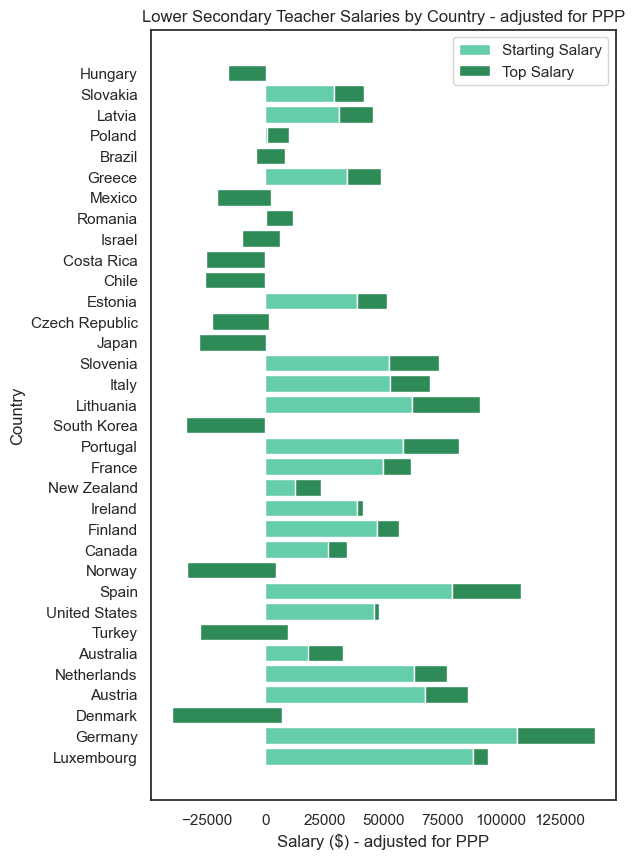

In [102]:
# Lower secondary PPP adjusted
plt.figure(figsize=(6,10))
plt.barh(teacher_salaries_adjusted['Country'], teacher_salaries_adjusted['lower_secondary_starting'], label='Starting Salary', color='mediumaquamarine')
plt.barh(teacher_salaries_adjusted['Country'], teacher_salaries_adjusted['lower_secondary_top']- teacher_salaries['lower_secondary_starting'], left=teacher_salaries_adjusted['lower_secondary_starting'], label='Top Salary', color='seagreen')

# Labels & Title
plt.xlabel('Salary ($) - adjusted for PPP')
plt.ylabel('Country')
plt.title('Lower Secondary Teacher Salaries by Country - adjusted for PPP')
plt.legend()

# Save the plot
plt.savefig('PPP_lower_secondary_teacher_salaries_plot.png', dpi=300, bbox_inches='tight')  # Save as PNG with high resolution

# Show the plot
plt.show()

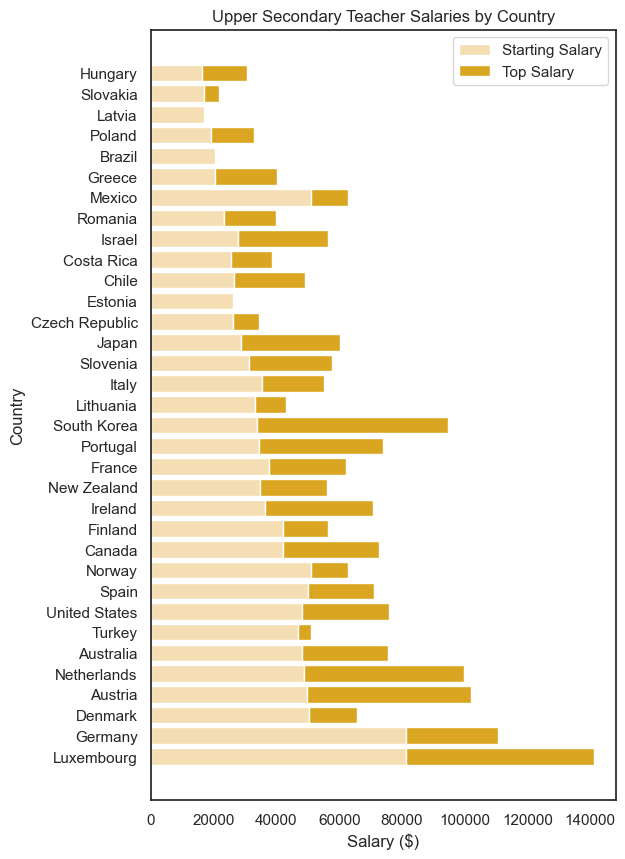

In [103]:
# Upper secondary
plt.figure(figsize=(6,10))
plt.barh(teacher_salaries['Country'], teacher_salaries['upper_secondary_starting'], label='Starting Salary', color='wheat')
plt.barh(teacher_salaries['Country'], teacher_salaries['upper_secondary_top']- teacher_salaries['upper_secondary_starting'], left=teacher_salaries['upper_secondary_starting'], label='Top Salary', color='goldenrod')

# Labels & Title
plt.xlabel('Salary ($)')
plt.ylabel('Country')
plt.title('Upper Secondary Teacher Salaries by Country')
plt.legend()

# Save the plot
plt.savefig('upper_secondary_teacher_salaries_plot.png', dpi=300, bbox_inches='tight')  # Save as PNG with high resolution

# Show the plot
plt.show()

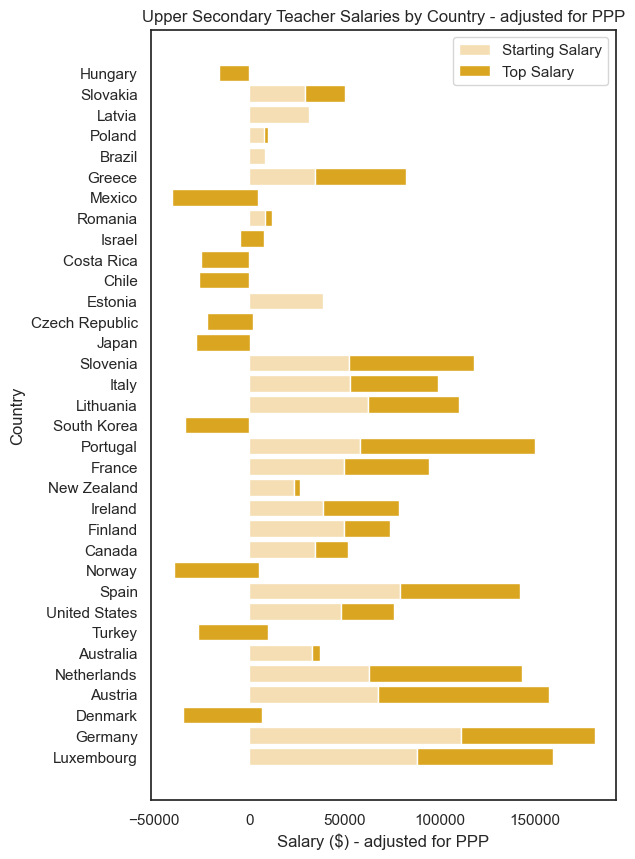

In [104]:
# Upper secondary PPP adjusted
plt.figure(figsize=(6,10))
plt.barh(teacher_salaries_adjusted['Country'], teacher_salaries_adjusted['upper_secondary_starting'], label='Starting Salary', color='wheat')
plt.barh(teacher_salaries_adjusted['Country'], teacher_salaries_adjusted['upper_secondary_top']- teacher_salaries['upper_secondary_starting'], left=teacher_salaries_adjusted['upper_secondary_starting'], label='Top Salary', color='goldenrod')

# Labels & Title
plt.xlabel('Salary ($) - adjusted for PPP')
plt.ylabel('Country')
plt.title('Upper Secondary Teacher Salaries by Country - adjusted for PPP')
plt.legend()

# Save the plot
plt.savefig('PPP_upper_secondary_teacher_salaries_plot.png', dpi=300, bbox_inches='tight')  # Save as PNG with high resolution

# Show the plot
plt.show()

Maps

In [105]:
# Primary starting
px.choropleth(teacher_salaries, 
              locations='Country', # specifies the column in your DataFrame that contains the country
              locationmode='country names', # indicates that the locations parameter contains country names
              color='primary_starting',
              color_continuous_scale=[(0, 'mintcream'), (0.5, 'steelblue'), (1, 'midnightblue')] ) #ISO

In [106]:
# Primary starting
bins = [0, 20000, 40000, 60000, 80000, 200000]
labels = ['<20k', '20-40k', '40-60k', '60-80k', '80k+']

# Create a new column with salary categories
teacher_salaries['salary_category1'] = pd.cut(teacher_salaries['primary_starting'], bins=bins, labels=labels)

# Define discrete colors
color_map = {
    '<20k': 'mintcream', 
    '20-40k': 'lightcyan', 
    '40-60k': 'skyblue',   
    '60-80k': 'steelblue', 
    '80k+': 'midnightblue', 
}

# Plot with discrete color categories
fig = px.choropleth(teacher_salaries, 
                     locations='Country', 
                     locationmode='country names', 
                     color='salary_category1',
                     color_discrete_map=color_map)

fig.show()

In [107]:
# Primary top
bins = [0, 20000, 40000, 60000, 80000, 200000]
labels = ['<20k', '20-40k', '40-60k', '60-80k', '80k+']

# Create a new column with salary categories
teacher_salaries['salary_category2'] = pd.cut(teacher_salaries['primary_top'], bins=bins, labels=labels)

# Define discrete colors
color_map = {
    '<20k': 'mintcream', 
    '20-40k': 'lightcyan', 
    '40-60k': 'skyblue',   
    '60-80k': 'steelblue', 
    '80k+': 'midnightblue', 
}

# Plot with discrete color categories
fig = px.choropleth(teacher_salaries, 
                     locations='Country', 
                     locationmode='country names', 
                     color='salary_category2',
                     color_discrete_map=color_map)

fig.show()

In [108]:
# Lower secondary starting
bins = [0, 20000, 40000, 60000, 80000, 200000]
labels = ['<20k', '20-40k', '40-60k', '60-80k', '80k+']

# Create a new column with salary categories
teacher_salaries['salary_category3'] = pd.cut(teacher_salaries['lower_secondary_starting'], bins=bins, labels=labels)

# Define discrete colors
color_map = {
    '<20k': 'honeydew',        # Very pale green
    '20-40k': 'lightgreen',    # Soft pastel green
    '40-60k': 'mediumseagreen', # Balanced green
    '60-80k': 'seagreen',      # Richer green
    '80k+': 'darkgreen'        # Deep dark green
}

# Plot with discrete color categories
fig = px.choropleth(teacher_salaries, 
                     locations='Country', 
                     locationmode='country names', 
                     color='salary_category3',
                     color_discrete_map=color_map)

fig.show()

In [109]:
# Lower secondary top
bins = [0, 20000, 40000, 60000, 80000, 200000]
labels = ['<20k', '20-40k', '40-60k', '60-80k', '80k+']

# Create a new column with salary categories
teacher_salaries['salary_category4'] = pd.cut(teacher_salaries['lower_secondary_top'], bins=bins, labels=labels)

# Define discrete colors
color_map = {
    '<20k': 'honeydew',        # Very pale green
    '20-40k': 'lightgreen',    # Soft pastel green
    '40-60k': 'mediumseagreen', # Balanced green
    '60-80k': 'seagreen',      # Richer green
    '80k+': 'darkgreen'        # Deep dark green
}

# Plot with discrete color categories
fig = px.choropleth(teacher_salaries, 
                     locations='Country', 
                     locationmode='country names', 
                     color='salary_category4',
                     color_discrete_map=color_map)

fig.show()

#### Average salaries

Bar graph

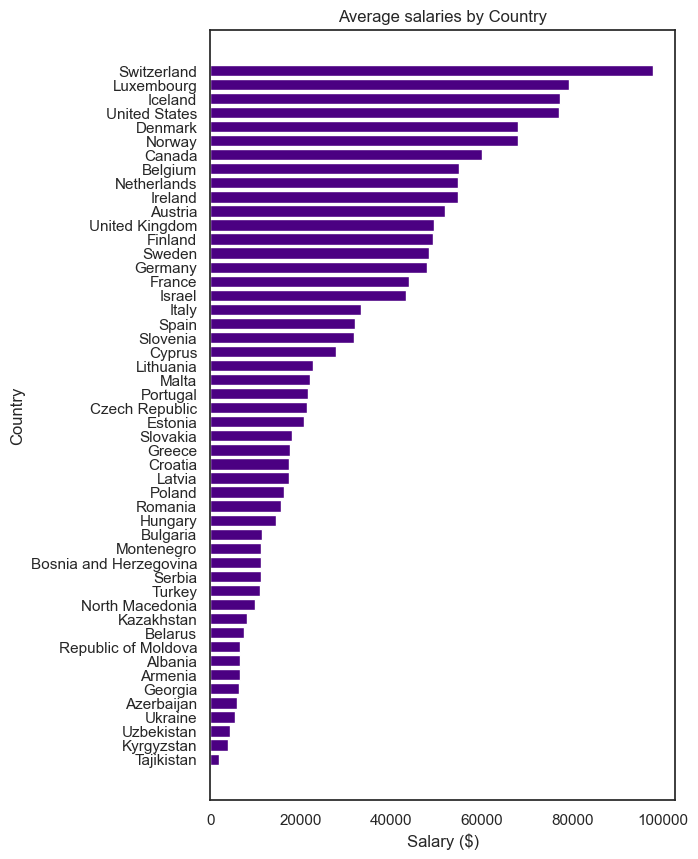

In [110]:
# Sort the data by salary in ascending order
average_salaries_sorted = average_salaries.sort_values(by='Annual_Salary_2022')

# Create the horizontal bar plot
plt.figure(figsize=(6,10))
plt.barh(average_salaries_sorted['Country'], average_salaries_sorted['Annual_Salary_2022'], color='indigo')

# Labels & Title
plt.xlabel('Salary ($)')
plt.ylabel('Country')
plt.title('Average salaries by Country')

# Save the plot
plt.savefig('average_salaries_plot.png', dpi=300, bbox_inches='tight')  

# Show the plot
plt.show()

#### Teacher salaries vs avg salaries

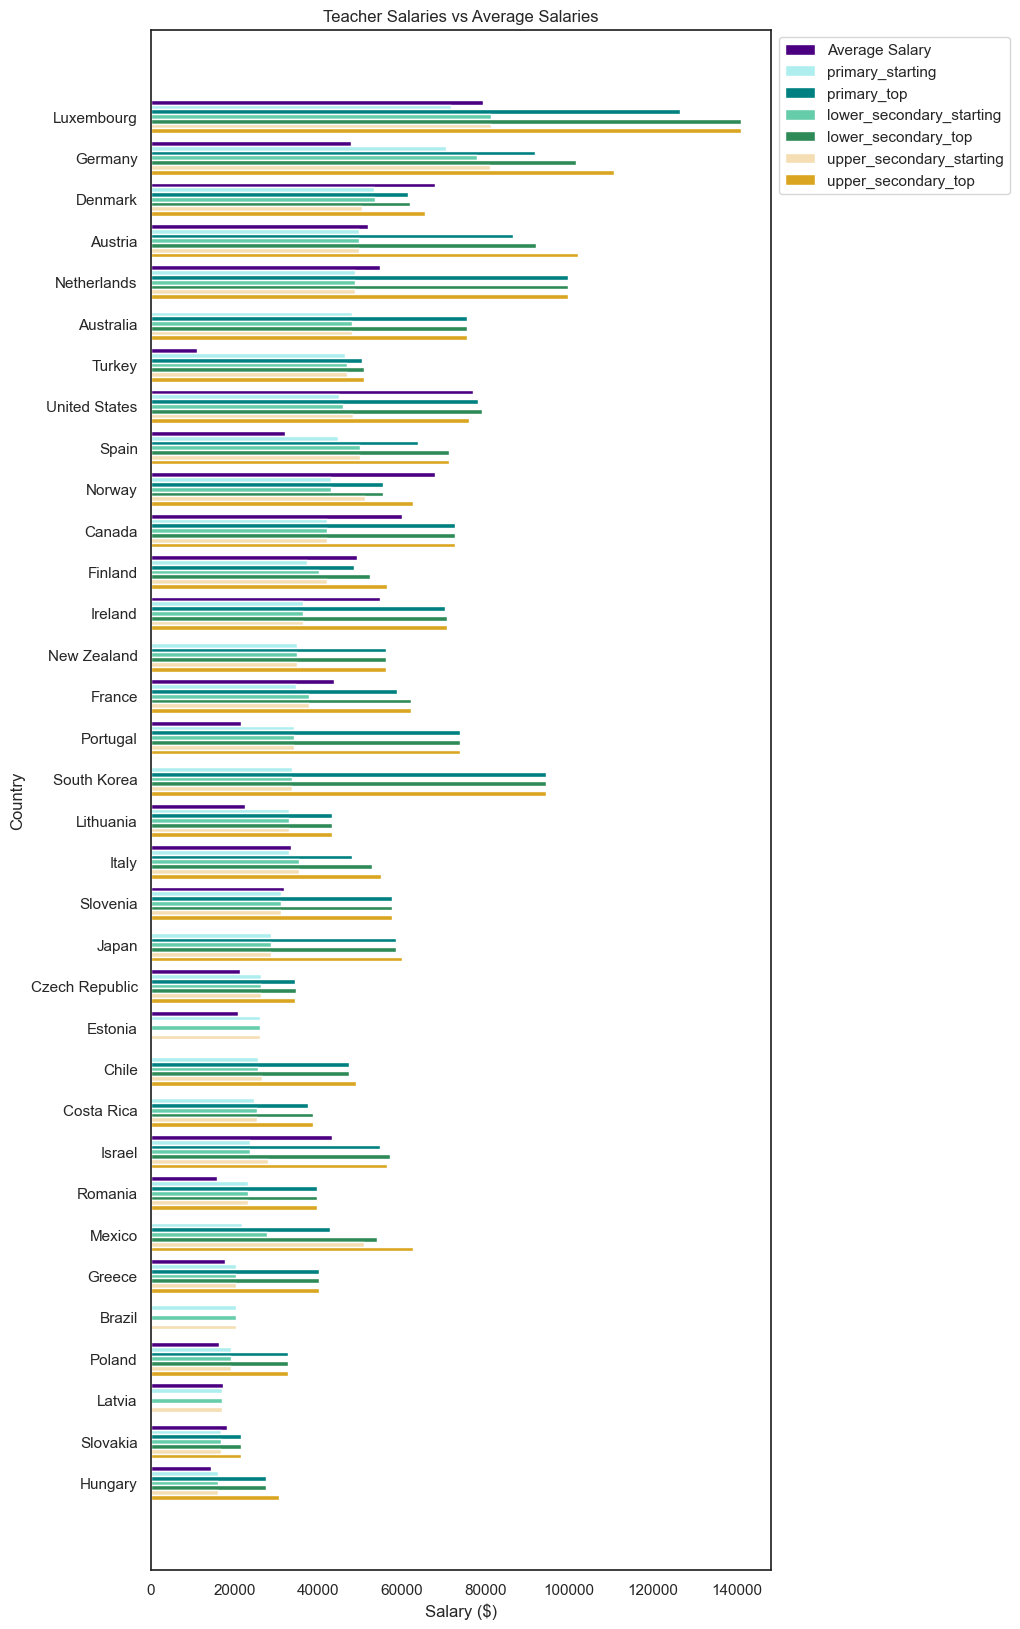

In [111]:
# Grouped bar graph
# Define custom colors
colors = {
    'Annual_Salary_2022': 'indigo',
    'primary_starting': 'paleturquoise',
   'primary_top': 'teal',
    'lower_secondary_starting': 'mediumaquamarine',
   'lower_secondary_top': 'seagreen',
    'upper_secondary_starting': 'wheat',
    'upper_secondary_top': 'goldenrod',
}

# Plot settings
bar_height = 0.15  # Height of bars
gap = 0.3  # Space between countries
y_positions = np.arange(0, len(salaries["Country"]) * (1 + gap), 1 + gap)  # Adjusted Y positions

# Create figure
fig, ax = plt.subplots(figsize=(8, 20))

# Plot average salary separately
ax.barh(y_positions, salaries["Annual_Salary_2022"], bar_height, label="Average Salary", color=colors["Annual_Salary_2022"])

# Exclude 'Country' and 'Annual_Salary_2022' from loop
teacher_salary_cols = ['primary_starting', 'primary_top',
       'lower_secondary_starting', 'lower_secondary_top',
       'upper_secondary_starting', 'upper_secondary_top']

# Plot teacher salary bars with colors
for i, col in enumerate(teacher_salary_cols):  
    ax.barh(y_positions + (i+1) * bar_height, salaries[col], bar_height, label=col, color=colors[col])

# Labels & formatting
ax.set_yticks(y_positions + bar_height * (len(teacher_salary_cols) / 2))  # Center ticks
ax.set_yticklabels(salaries["Country"])
ax.set_xlabel("Salary ($)")
ax.set_ylabel("Country")
ax.set_title("Teacher Salaries vs Average Salaries")
ax.legend(loc="upper left", bbox_to_anchor=(1,1))

plt.gca().invert_yaxis()  # Keep highest salaries at the top
plt.show()

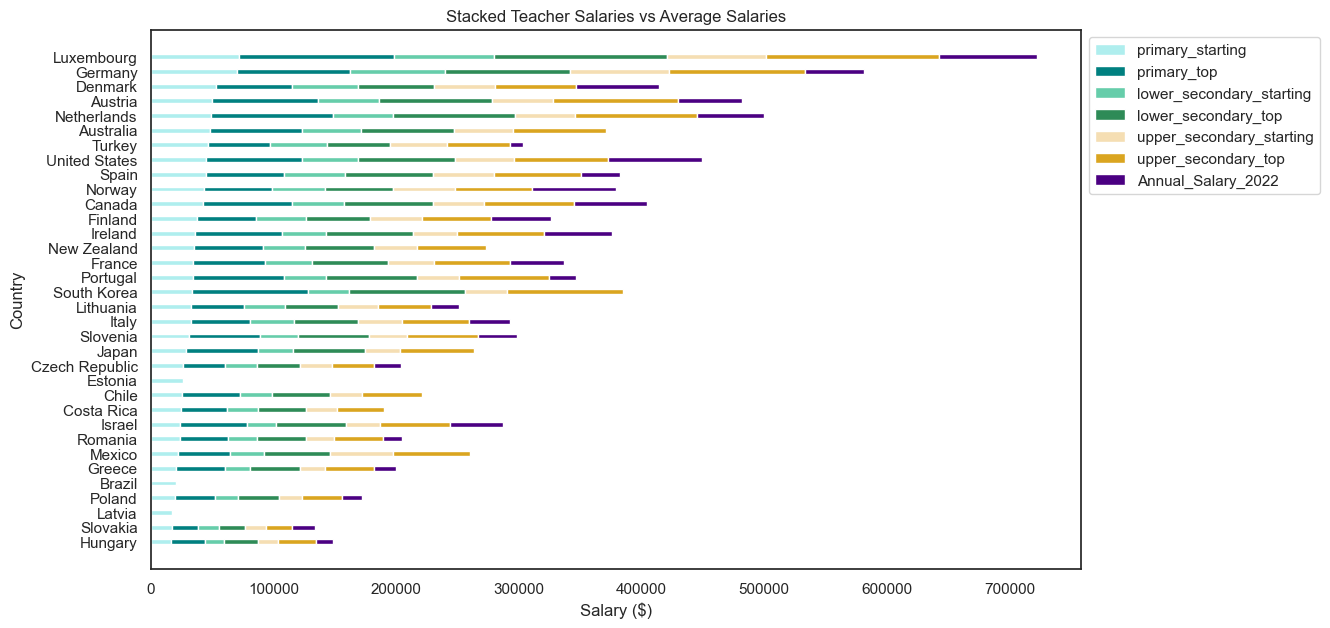

In [112]:
# Stacked bar graph
bar_height = 0.6  # Height of stacked bars
gap = 0.8  # Space between countries
y_positions = np.arange(0, len(salaries["Country"]) * (1 + gap), 1 + gap)  # Adjusted Y positions

# Create figure
fig, ax = plt.subplots(figsize=(12, 7))

# Initialize bottom position for stacking
bottom = np.zeros(len(salaries))  

# Exclude 'Country' from loop
salary_cols = salaries.columns[1:]  # Includes 'Annual_Salary_2022' and teacher salaries

# Plot stacked bars
for col in salary_cols:  
    ax.barh(y_positions, salaries[col], bar_height, label=col, color=colors[col], left=bottom)
    bottom += salaries[col].values  # Stack bars on top of each other

# Labels & formatting
ax.set_yticks(y_positions)  # Keep countries aligned
ax.set_yticklabels(salaries["Country"])
ax.set_xlabel("Salary ($)")
ax.set_ylabel("Country")
ax.set_title("Stacked Teacher Salaries vs Average Salaries")
ax.legend(loc="upper left", bbox_to_anchor=(1,1))

plt.gca().invert_yaxis()  # Optional: Keep highest salaries at the top
plt.show()

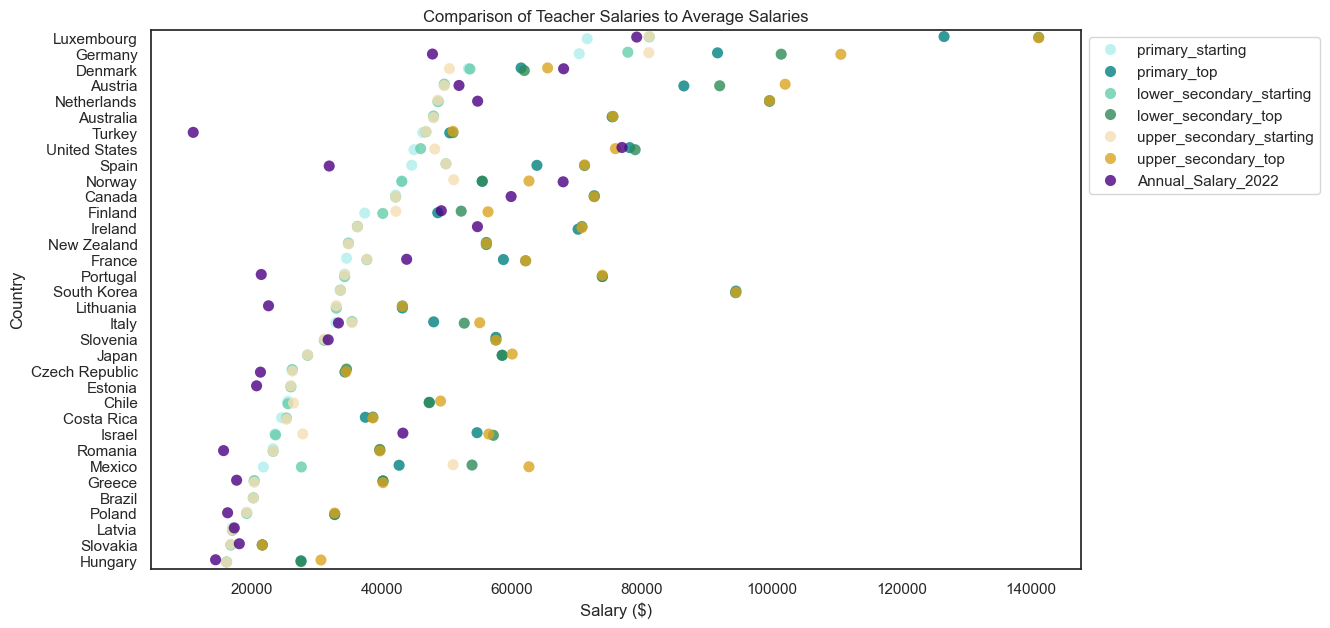

In [113]:
# Dot plot

# Convert DataFrame to long format for Seaborn
df_melted = salaries.melt(id_vars=["Country"], var_name="Salary Type", value_name="Salary")

# Create figure
plt.figure(figsize=(12, 7))

# Map salary types to colors
palette = [colors[col] for col in df_melted["Salary Type"].unique()]

# Create dot plot
sns.stripplot(x="Salary", y="Country", hue="Salary Type", data=df_melted, 
              jitter=True, size=8, palette=palette, alpha=0.8)

# Formatting
plt.title("Comparison of Teacher Salaries to Average Salaries")
plt.xlabel("Salary ($)")
plt.ylabel("Country")
plt.legend(loc="upper left", bbox_to_anchor=(1,1))

plt.show()